In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [123]:
# Define the URL and parameters with full ISO format for date and time
url = "https://api-baltic.transparency-dashboard.eu/api/v1/export"
params = {
        "id": "imbalance_volumes",
        "start_date": "2024-09-23T00:00:00Z",
        "end_date": "2024-09-29T00:00:00Z",
        "output_time_zone": "CET",
        "output_format": "json",
        "json_header_groups": 0
    }

In [124]:
# Send a GET request
response = requests.get(url, params=params)
    
    # Check if the request was successful
if response.status_code == 200:
        data = response.json()  # Parse JSON response
        print("Data fetched successfully!")
        print(data)  # Inspect the data structure
else:
        print(f"Failed to retrieve data. Status code: {response.status_code}")
        print(response.json())  # Print the error message for more details

Data fetched successfully!
{'error': False, 'message': None, 'data': {'id': 'imbalance_volumes', 'export_id': 'F3pUVJblqh3uYBCm1va6akDFf8itJZq7IticPLhbTeA', 'measurement_unit': 'MWh', 'resolution': 'PT1H', 'precision': 3, 'precision_mode': 'cut', 'default_display': 'table', 'title': 'Imbalance volumes (legacy)', 'description': '<p>Imbalance volumes depict the hourly area control error value as it would have been be if power balancing was not performed by the TSOs.</p>', 'timezone': 'CET', 'local_timezone': 'Europe/Warsaw', 'daylight_saving_transitions': False, 'creation_time': '2024-10-29T12:45:27+01:00', 'column_group_levels': 1, 'columns': [{'index': 0, 'col': 0, 'label': None, 'group_level_0': 'Baltics', 'res': 'PT1H'}, {'index': 1, 'col': 0, 'label': None, 'group_level_0': 'Estonia', 'res': 'PT1H'}, {'index': 2, 'col': 0, 'label': None, 'group_level_0': 'Latvia', 'res': 'PT1H'}, {'index': 3, 'col': 0, 'label': None, 'group_level_0': 'Lithuania', 'res': 'PT1H'}], 'timeseries': [{'fr

In [125]:
time_series_data = data['data']['timeseries']

In [126]:
timestamps = []
baltic_total = []
estonia = []
latvia = []
lithuania = []

In [127]:
for entry in time_series_data:
        timestamps.append(entry['from'])
        values = entry['values']
        baltic_total.append(values[0])
        estonia.append(values[1])
        latvia.append(values[2])
        lithuania.append(values[3])

In [185]:
df_imbalance = pd.DataFrame({
    'timestamp': timestamps,
    'Baltic': baltic_total,
    'Estonia': estonia,
    'Latvia': latvia,
    'Lithuania': lithuania
})

In [186]:
print(df_imbalance.columns)

Index(['timestamp', 'Baltic', 'Estonia', 'Latvia', 'Lithuania'], dtype='object')


In [151]:
# Convert 'timestamp' to datetime format
df_imbalance['timestamp'] = pd.to_datetime(df_imbalance['timestamp'])

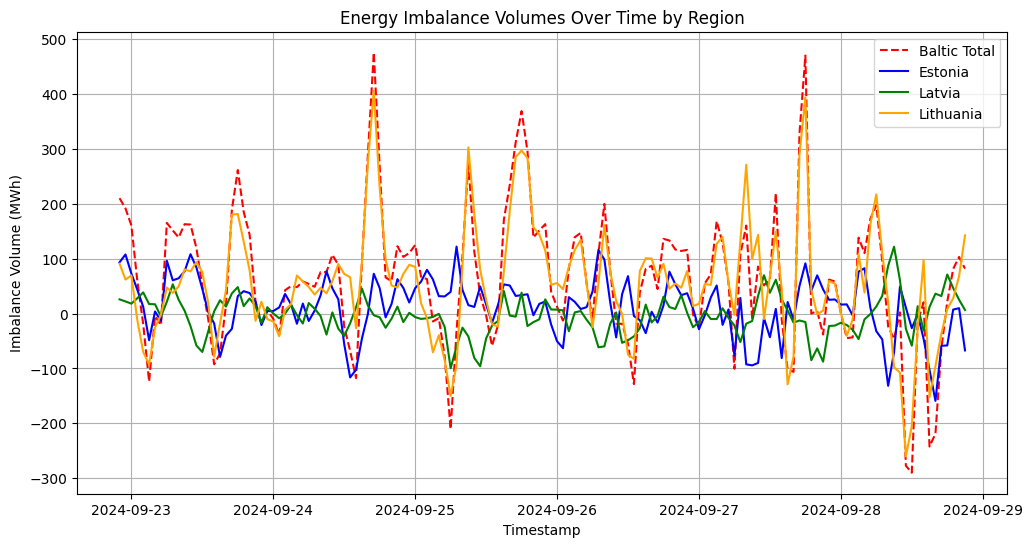

In [152]:
# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot each region
plt.plot(df_imbalance['timestamp'], df_imbalance['Baltic'], label='Baltic Total', color='red', linestyle='--')
plt.plot(df_imbalance['timestamp'], df_imbalance['Estonia'], label='Estonia', color='blue')
plt.plot(df_imbalance['timestamp'], df_imbalance['Latvia'], label='Latvia', color='green')
plt.plot(df_imbalance['timestamp'], df_imbalance['Lithuania'], label='Lithuania', color='orange')

# Add labels and legend
plt.xlabel('Timestamp')
plt.ylabel('Imbalance Volume (MWh)')
plt.title('Energy Imbalance Volumes Over Time by Region')
plt.legend()
plt.grid(True)
plt.show()


In [131]:
#Normal activations total

In [132]:
# Define the URL and parameters with full ISO format for date and time
url = "https://api-baltic.transparency-dashboard.eu/api/v1/export"
params = {
        "id": "normal_activations_total",
        "start_date": "2024-09-23T00:00:00Z",
        "end_date": "2024-09-29T00:00:00Z",
        "output_time_zone": "CET",
        "output_format": "json",
        "json_header_groups": 0
    }

In [133]:
# Send a GET request
response = requests.get(url, params=params)
    
    # Check if the request was successful
if response.status_code == 200:
        data = response.json()  # Parse JSON response
        print("Data fetched successfully!")
        print(data)  # Inspect the data structure
else:
        print(f"Failed to retrieve data. Status code: {response.status_code}")
        print(response.json())  # Print the error message for more details

Data fetched successfully!
{'error': False, 'message': None, 'data': {'id': 'normal_activations_total', 'export_id': '4J3fd1uuLYLa9InnZw5wMoxZM0mZSYByzt8II2vbd9k', 'measurement_unit': 'MWh', 'resolution': 'PT1H', 'precision': 3, 'precision_mode': 'cut', 'default_display': 'table', 'title': 'Normal activations - Total', 'description': '<p>Aggregated volume of balancing energy bids activated from both mFRR &amp; ER mFRR product bids for Baltic CoBA balancing purposes with the aim of minimizing the Baltic ACE. Volumes are shown based on the location of the resource.</p>', 'timezone': 'CET', 'local_timezone': 'Europe/Warsaw', 'daylight_saving_transitions': False, 'creation_time': '2024-10-29T12:45:33+01:00', 'column_group_levels': 1, 'columns': [{'index': 0, 'col': 0, 'label': 'Upward', 'group_level_0': 'Baltics', 'res': 'PT1H'}, {'index': 1, 'col': 1, 'label': 'Downward', 'group_level_0': 'Baltics', 'res': 'PT1H'}, {'index': 2, 'col': 0, 'label': 'Upward', 'group_level_0': 'Estonia', 'res

In [134]:
# Extract time series data
time_series_data = data['data']['timeseries']

In [135]:
# Initialize lists for timestamps and values
timestamps = []
baltic_upward = []
baltic_downward = []
estonia_upward = []
estonia_downward = []
latvia_upward = []
latvia_downward = []
lithuania_upward = []
lithuania_downward = []

In [136]:
# Loop through each time interval and separate values
for entry in time_series_data:
        timestamps.append(entry['from'])
        values = entry['values']
        
        # Append values for each region
        baltic_upward.append(values[0])
        baltic_downward.append(values[1])
        estonia_upward.append(values[2])
        estonia_downward.append(values[3])
        latvia_upward.append(values[4])
        latvia_downward.append(values[5])
        lithuania_upward.append(values[6])
        lithuania_downward.append(values[7])

In [169]:
# Create a DataFrame
df_activation = pd.DataFrame({
        'timestamp': timestamps,
        'Baltic Upward': baltic_upward,
        'Baltic Downward': baltic_downward,
        'Estonia Upward': estonia_upward,
        'Estonia Downward': estonia_downward,
        'Latvia Upward': latvia_upward,
        'Latvia Downward': latvia_downward,
        'Lithuania Upward': lithuania_upward,
        'Lithuania Downward': lithuania_downward
    })


In [171]:
# Convert 'timestamp' to datetime format
df_activation['timestamp'] = pd.to_datetime(df_activation['timestamp'])

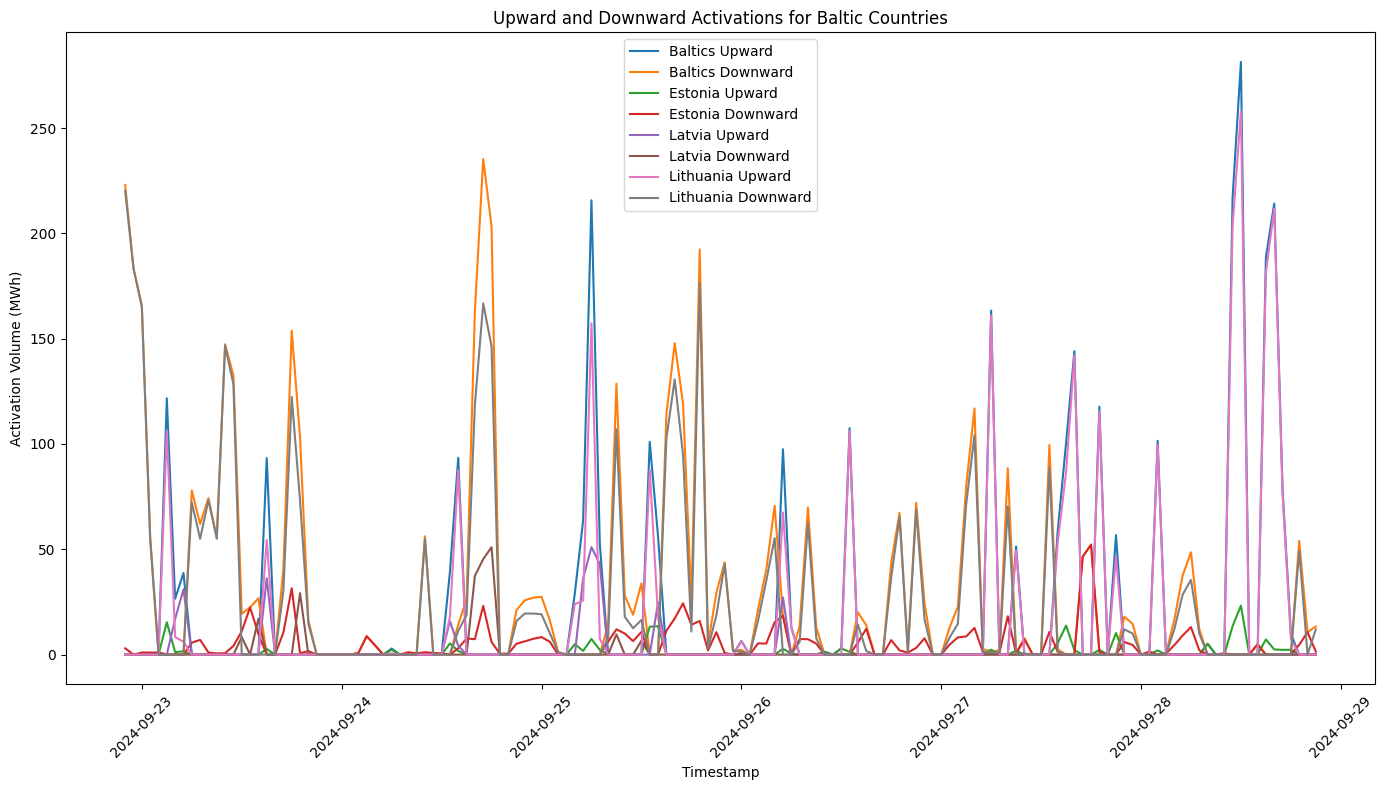

In [173]:
# Plot the activations
plt.figure(figsize=(14, 8))

# Plot Baltic upward and downward activations
plt.plot(df_activation['timestamp'], df_activation['Baltic Upward'], label='Baltics Upward')
plt.plot(df_activation['timestamp'], df_activation['Baltic Downward'], label='Baltics Downward')

# Plot Estonia upward and downward activations
plt.plot(df_activation['timestamp'], df_activation['Estonia Upward'], label='Estonia Upward')
plt.plot(df_activation['timestamp'], df_activation['Estonia Downward'], label='Estonia Downward')

# Plot Latvia upward and downward activations
plt.plot(df_activation['timestamp'], df_activation['Latvia Upward'], label='Latvia Upward')
plt.plot(df_activation['timestamp'], df_activation['Latvia Downward'], label='Latvia Downward')

# Plot Lithuania upward and downward activations
plt.plot(df_activation['timestamp'], df_activation['Lithuania Upward'], label='Lithuania Upward')
plt.plot(df_activation['timestamp'], df_activation['Lithuania Downward'], label='Lithuania Downward')

# Customize the plot
plt.xlabel('Timestamp')
plt.ylabel('Activation Volume (MWh)')
plt.title('Upward and Downward Activations for Baltic Countries')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [143]:
#Combined graph

In [153]:
import matplotlib.pyplot as plt
import pandas as pd

In [191]:
# Ensure timestamp in df_imbalance is in datetime format
df_imbalance['timestamp'] = pd.to_datetime(df_imbalance['timestamp'])

# Ensure timestamp in df_reduced is in datetime format
df_activation['timestamp'] = pd.to_datetime(df_activation['timestamp'])


In [192]:
df_activation['Baltic Downward'] = -df_activation['Baltic Downward']
df_activation.loc[:, 'Activation action'] = df_activation['Baltic Upward'] + df_activation['Baltic Downward']
df_combined = pd.merge(df_imbalance, df_activation, on='timestamp', how='inner')

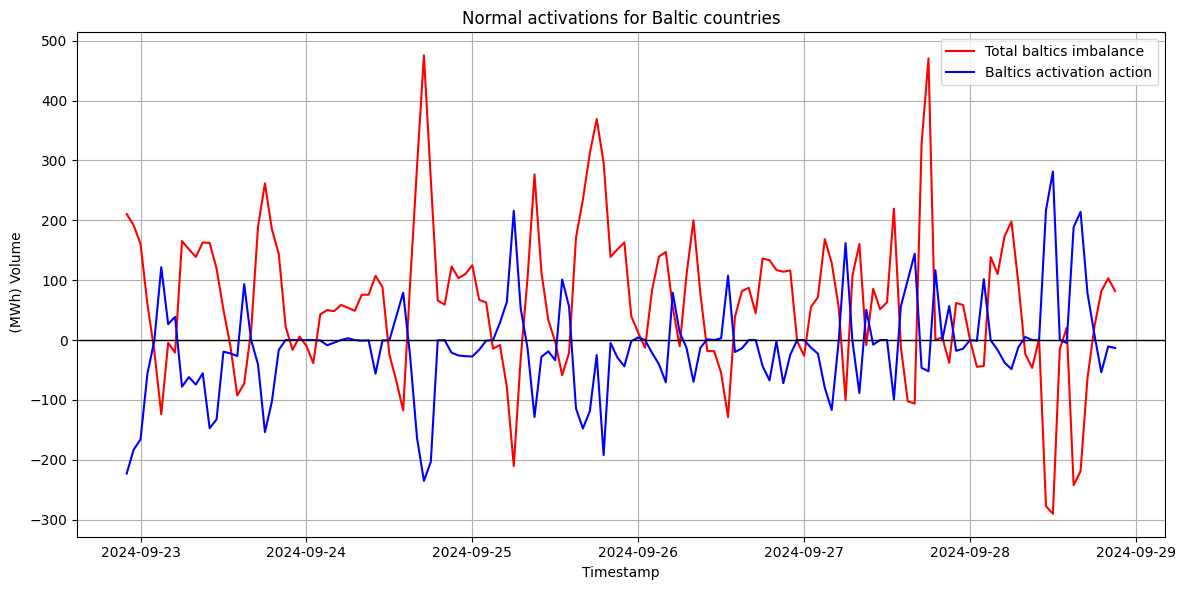

In [193]:
plt.figure(figsize=(12, 6))

plt.plot(df['timestamp'], df_imbalance['Baltic'], label='Total baltics imbalance', color='red')

# Make sure the data exists and try plotting from df_reduced directly
if 'Activation action' in df_reduced.columns:
    plt.plot(df_activation['timestamp'], df_activation['Activation action'], label='Baltics activation action', color='blue')
else:
    print("Column 'Activation action' not found in df_activation")

# Customize the plot
plt.xlabel('Timestamp')
plt.ylabel(' (MWh) Volume')
plt.title('Normal activations for Baltic countries')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.axhline(y=0, color='black', linewidth=1)


# Show the plot
plt.show()